In [51]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [52]:
# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='Malgun Gothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.v

['Malgun Gothic']


In [53]:
# 지수표현 제거
pd.options.display.float_format = '{:.5f}'.format

In [54]:
log_cluster=pd.read_csv('log_cluster_final.csv')
user_cluster=pd.read_csv('user_cluster_final.csv')

In [55]:
log_cluster.head()

,user_id,date,time,cluster,count
0,1,2022-06-16,8,1,2
1,7,2022-05-22,0,1,1
2,9,2022-05-21,354,1,1
3,11,2022-06-13,1687,1,5
4,12,2022-06-30,2744,2,15


In [56]:
user_cluster.head()

,user_id,loanapply_insert_time,birth_year,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,gender
0,430982,2022-05-16,20,620.00000,2000000.00000,EARNEDINCOME,정규직,자가,35000000.00000,대환대출,2.00000,15000000.00000,1.00000
1,345273,2022-05-21,40,700.00000,60000000.00000,EARNEDINCOME,정규직,자가,50000000.00000,생활비,3.00000,86000000.00000,1.00000
2,3058,2022-06-03,30,910.00000,44000000.00000,FREELANCER,기타,전월세,22000000.00000,생활비,3.00000,23000000.00000,1.00000
3,181137,2022-06-04,20,740.00000,30000000.00000,EARNEDINCOME,정규직,전월세,10000000.00000,전월세보증금,3.00000,43000000.00000,1.00000
4,197454,2022-06-07,30,550.00000,41000000.00000,EARNEDINCOME,계약직,전월세,5000000.00000,전월세보증금,2.00000,42000000.00000,1.00000


In [9]:
user_cluster.shape

(314147, 13)

In [25]:
user_log_merge = pd.merge(left=user_cluster, right=log_cluster,
         left_on=['user_id', 'loanapply_insert_time'], right_on=['user_id', 'date'],
         how='inner')
user_log_merge.head()

,user_id,loanapply_insert_time,birth_year,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,gender,date,time,cluster,count
0,197454,2022-06-07,30,550.00000,41000000.00000,EARNEDINCOME,계약직,전월세,5000000.00000,전월세보증금,2.00000,42000000.00000,1.00000,2022-06-07,386,0,1
1,82141,2022-06-07,30,980.00000,30000000.00000,EARNEDINCOME,정규직,전월세,10000000.00000,생활비,1.00000,30000000.00000,1.00000,2022-06-07,33,0,1
2,158340,2022-06-07,50,740.00000,26000000.00000,EARNEDINCOME,정규직,전월세,5000000.00000,생활비,3.00000,43000000.00000,1.00000,2022-06-07,184,2,1
3,685041,2022-06-07,40,830.00000,250000000.00000,PRIVATEBUSINESS,정규직,전월세,600000000.00000,전월세보증금,4.00000,255000000.00000,0.00000,2022-06-07,215,0,1
4,751992,2022-06-07,40,660.00000,36000000.00000,OTHERINCOME,기타,자가,30000000.00000,대환대출,5.00000,27000000.00000,1.00000,2022-06-07,579,5,5


In [26]:
# 필요 없는 변수 제거
user_log_merge.drop(['user_id', 'loanapply_insert_time', 'date'], axis=1, inplace=True)

In [27]:
# cluster==0인 것
# data로 모델돌리기
data=user_log_merge[user_log_merge['cluster']==0]
data.shape   # 1만 6502개

(16502, 14)

## 데이터 분포 변환

array([[<AxesSubplot:title={'center':'birth_year'}>,
        <AxesSubplot:title={'center':'credit_score'}>,
        <AxesSubplot:title={'center':'yearly_income'}>],
       [<AxesSubplot:title={'center':'desired_amount'}>,
        <AxesSubplot:title={'center':'existing_loan_cnt'}>,
        <AxesSubplot:title={'center':'existing_loan_amt'}>],
       [<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'cluster'}>],
       [<AxesSubplot:title={'center':'count'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

C:\Users\rladp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rladp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


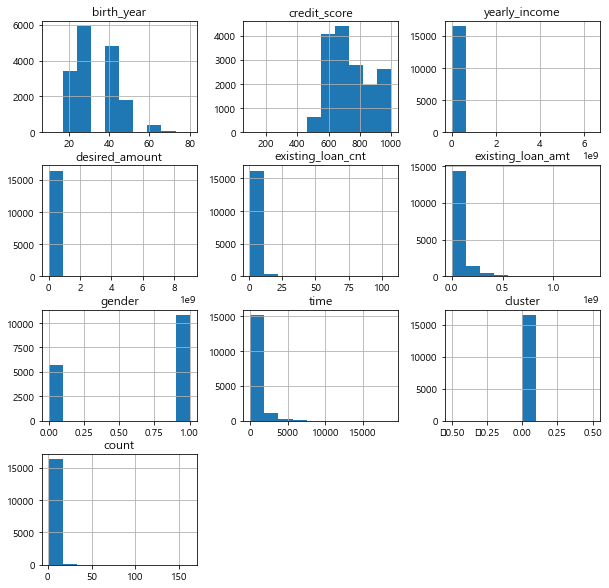

In [14]:
# 데이터 분포 확인
data.hist(figsize=(10,10))

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16502 entries, 0 to 96915
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   birth_year         16502 non-null  int64  
 1   credit_score       16502 non-null  float64
 2   yearly_income      16502 non-null  float64
 3   income_type        16502 non-null  object 
 4   employment_type    16502 non-null  object 
 5   houseown_type      16502 non-null  object 
 6   desired_amount     16502 non-null  float64
 7   purpose            16502 non-null  object 
 8   existing_loan_cnt  16502 non-null  float64
 9   existing_loan_amt  16502 non-null  float64
 10  gender             16502 non-null  float64
 11  time               16502 non-null  int64  
 12  cluster            16502 non-null  int64  
 13  count              16502 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 1.9+ MB


In [29]:
# 정규성 확인
import scipy.stats as stats

stats.kstest(data.iloc[:,11],'norm')

KstestResult(statistic=0.9922116931988407, pvalue=0.0)

##  yearly_income, desired_amount,  existing_loan_amt, existing_loan_cnt, time 변환 필요

C:\Users\rladp\AppData\Local\Temp/ipykernel_17928/970768978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['yearly_income']=np.log1p(data['yearly_income'])


<AxesSubplot:>

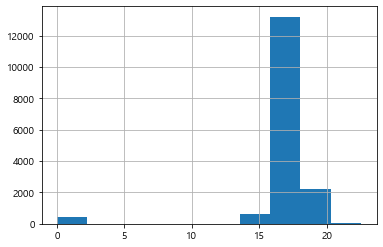

In [34]:
# yearly_imcome : 0값이 있으므로 log1p변환
data['yearly_income']=np.log1p(data['yearly_income'])
data['yearly_income'].hist()

C:\Users\rladp\AppData\Local\Temp/ipykernel_17928/3401114761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['desired_amount']=np.log1p(data['desired_amount'])


<AxesSubplot:>

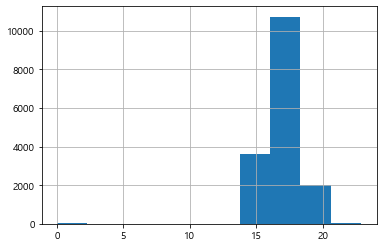

In [35]:
# desired_amount : 0값이 있으므로 log1p변환
data['desired_amount']=np.log1p(data['desired_amount'])
data['desired_amount'].hist()

C:\Users\rladp\AppData\Local\Temp/ipykernel_17928/1554881444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['existing_loan_cnt']=np.log1p(data['existing_loan_cnt'])


<AxesSubplot:>

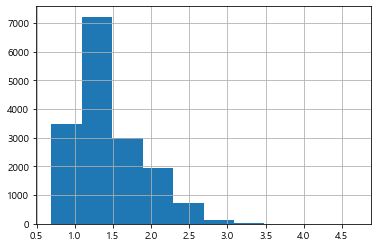

In [36]:
# 'existing_loan_cnt' : 0값이 없으므로 log1p변환
data['existing_loan_cnt']=np.log1p(data['existing_loan_cnt'])
data['existing_loan_cnt'].hist()

C:\Users\rladp\AppData\Local\Temp/ipykernel_17928/1840677009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['existing_loan_amt']=np.log1p(data['existing_loan_amt'])


<AxesSubplot:>

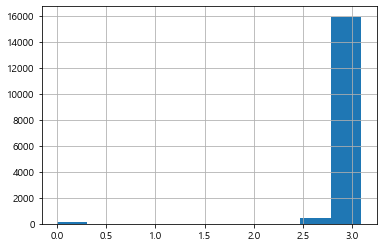

In [37]:
# dexisting_loan_amt : 0값이 있으므로 log1p변환
data['existing_loan_amt']=np.log1p(data['existing_loan_amt'])
data['existing_loan_amt'].hist()

<AxesSubplot:>

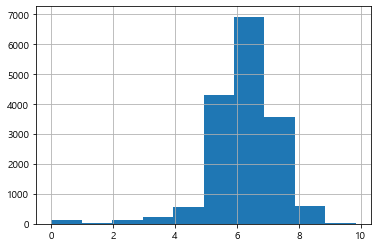

In [38]:
data['time'].hist()

C:\Users\rladp\AppData\Local\Temp/ipykernel_17928/1712194946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time']=np.log1p(data['time'])


<AxesSubplot:>

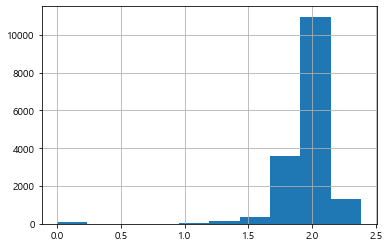

In [39]:
# time : 0값이 있으므로 log1p변환
data['time']=np.log1p(data['time'])
data['time'].hist()

In [40]:
# 분포변환한 데이터 카피
data_change=data.copy()

In [41]:
data_change.head()

,birth_year,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,gender,time,cluster,count
0,30,550.00000,17.52908,EARNEDINCOME,계약직,전월세,15.42495,전월세보증금,1.09861,2.92064,1.00000,1.93995,0,1
1,30,980.00000,17.21671,EARNEDINCOME,정규직,전월세,16.11810,생활비,0.69315,2.90234,1.00000,1.50992,0,1
3,40,830.00000,19.33697,PRIVATEBUSINESS,정규직,전월세,20.21244,전월세보증금,1.60944,3.01341,0.00000,1.85243,0,1
9,20,880.00000,17.78580,PRACTITIONER,정규직,전월세,18.68305,전월세보증금,1.09861,2.97857,0.00000,1.94891,0,1
10,40,620.00000,17.55318,EARNEDINCOME,정규직,전월세,15.42495,생활비,1.09861,2.87983,1.00000,2.07084,0,1


## 실루엣 계수 함수 정의

In [42]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=42)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [43]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=42)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

In [44]:
# 카테고리로 데이터 타입 변경
data_change[['birth_year','income_type','employment_type','houseown_type','purpose', 'gender']]=data_change[['birth_year', 'income_type','employment_type','houseown_type','purpose', 'gender']].astype('category')
data_change=pd.get_dummies(data_change)

## MinMaxScaler & KMeans

In [45]:
# MinMax Scaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


X_features_scaled2 = MinMaxScaler().fit_transform(data_change)

C:\Users\rladp\AppData\Local\Temp/ipykernel_17928/3470730150.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
C:\Users\rladp\AppData\Local\Temp/ipykernel_17928/3470730150.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


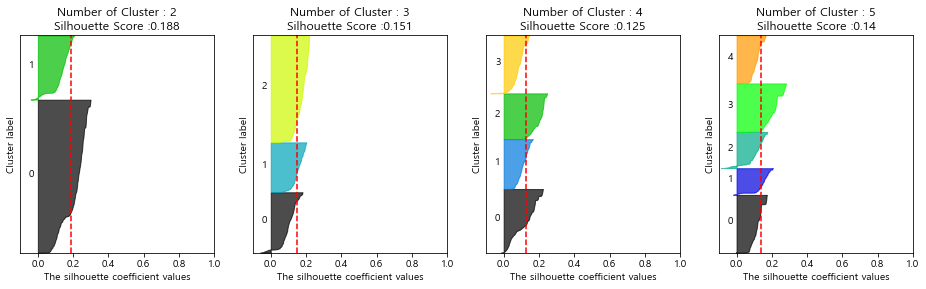

C:\Users\rladp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rladp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


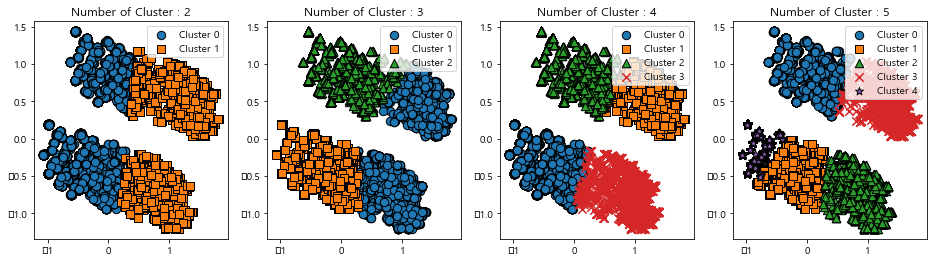

In [46]:
# minmax scaler & kmeans & 시각화
# 이게 제일 좋음!!!!!
# n_clusters=4로 하기 
visualize_silhouette([2,3,4,5],X_features_scaled2)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled2)  

In [48]:
X_features_scaled = MinMaxScaler().fit_transform(data_change)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_label = kmeans.fit_predict(X_features_scaled)

In [49]:
cluster_df=user_log_merge[user_log_merge['cluster']==0]
cluster_df['kmeans_minmax']=kmeans_label

C:\Users\rladp\AppData\Local\Temp/ipykernel_17928/4200363707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['kmeans_minmax']=kmeans_label


In [50]:
cluster_df.head()

,birth_year,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,gender,time,cluster,count,kmeans_minmax
0,30,550.00000,41000000.00000,EARNEDINCOME,계약직,전월세,5000000.00000,전월세보증금,2.00000,42000000.00000,1.00000,386,0,1,0
1,30,980.00000,30000000.00000,EARNEDINCOME,정규직,전월세,10000000.00000,생활비,1.00000,30000000.00000,1.00000,33,0,1,2
3,40,830.00000,250000000.00000,PRIVATEBUSINESS,정규직,전월세,600000000.00000,전월세보증금,4.00000,255000000.00000,0.00000,215,0,1,1
9,20,880.00000,53000000.00000,PRACTITIONER,정규직,전월세,130000000.00000,전월세보증금,2.00000,127000000.00000,0.00000,411,0,1,1
10,40,620.00000,42000000.00000,EARNEDINCOME,정규직,전월세,5000000.00000,생활비,2.00000,20000000.00000,1.00000,1023,0,1,2


In [66]:
cluster_df.to_csv('cluster0.csv')